In [21]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats


In [22]:
df = pd.read_csv(r"C:\Users\Mehak\Downloads\pcos_dataset_1500.csv")

# Display first 5 rows
print(df.head())

   Age   BMI  Lifestyle  Cycle_Length  Regularity  Flow  Cramps_Severity  \
0   24  25.7          1            25           1     1                1   
1   37  36.2          1            25           1     2                2   
2   32  26.3          1            29           1     2                2   
3   28  19.2          0            34           1     4                2   
4   25  36.4          0            33           1     4                2   

   Acne_Severity  Hair_Growth_Severity  Weight_Gain_Severity  \
0              1                     2                     1   
1              0                     1                     2   
2              1                     1                     2   
3              1                     1                     3   
4              2                     0                     1   

   Mood_Swings_Severity  Testosterone  LH_FSH_Ratio  Estrogen  \
0                     1         30.57          1.50    120.19   
1                     3     

In [23]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1500 non-null   int64  
 1   BMI                   1500 non-null   float64
 2   Lifestyle             1500 non-null   int64  
 3   Cycle_Length          1500 non-null   int64  
 4   Regularity            1500 non-null   int64  
 5   Flow                  1500 non-null   int64  
 6   Cramps_Severity       1500 non-null   int64  
 7   Acne_Severity         1500 non-null   int64  
 8   Hair_Growth_Severity  1500 non-null   int64  
 9   Weight_Gain_Severity  1500 non-null   int64  
 10  Mood_Swings_Severity  1500 non-null   int64  
 11  Testosterone          1500 non-null   float64
 12  LH_FSH_Ratio          1500 non-null   float64
 13  Estrogen              1500 non-null   float64
 14  Insulin_Resistance    1500 non-null   int64  
 15  TSH                  

In [24]:
print(df.isnull().sum())

Age                     0
BMI                     0
Lifestyle               0
Cycle_Length            0
Regularity              0
Flow                    0
Cramps_Severity         0
Acne_Severity           0
Hair_Growth_Severity    0
Weight_Gain_Severity    0
Mood_Swings_Severity    0
Testosterone            0
LH_FSH_Ratio            0
Estrogen                0
Insulin_Resistance      0
TSH                     0
T3                      0
T4                      0
PCOS_Probability        0
dtype: int64


count    1500.000000
mean        0.499600
std         0.288287
min         0.000000
25%         0.250000
50%         0.495000
75%         0.752500
max         1.000000
Name: PCOS_Probability, dtype: float64


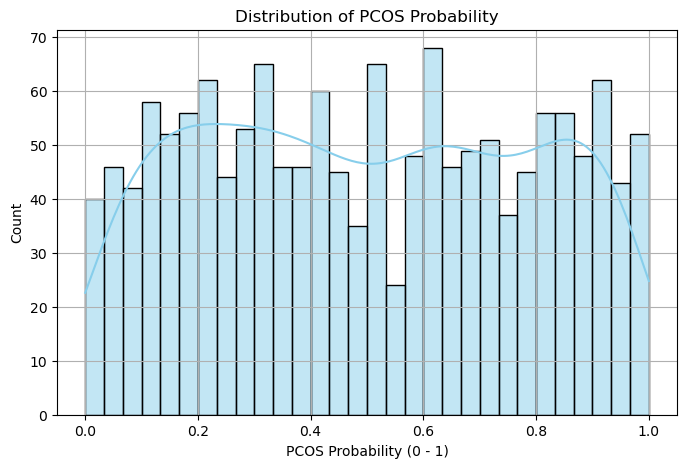

In [25]:
if 'PCOS_Probability' in df.columns:
    # Summary statistics
    print(df['PCOS_Probability'].describe())

    # Plot the distribution
    plt.figure(figsize=(8,5))
    sns.histplot(df['PCOS_Probability'], bins=30, kde=True, color='skyblue')
    plt.title("Distribution of PCOS Probability")
    plt.xlabel("PCOS Probability (0 - 1)")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()
else:
    print(" 'PCOS_Probability' column not found. Check column names.")

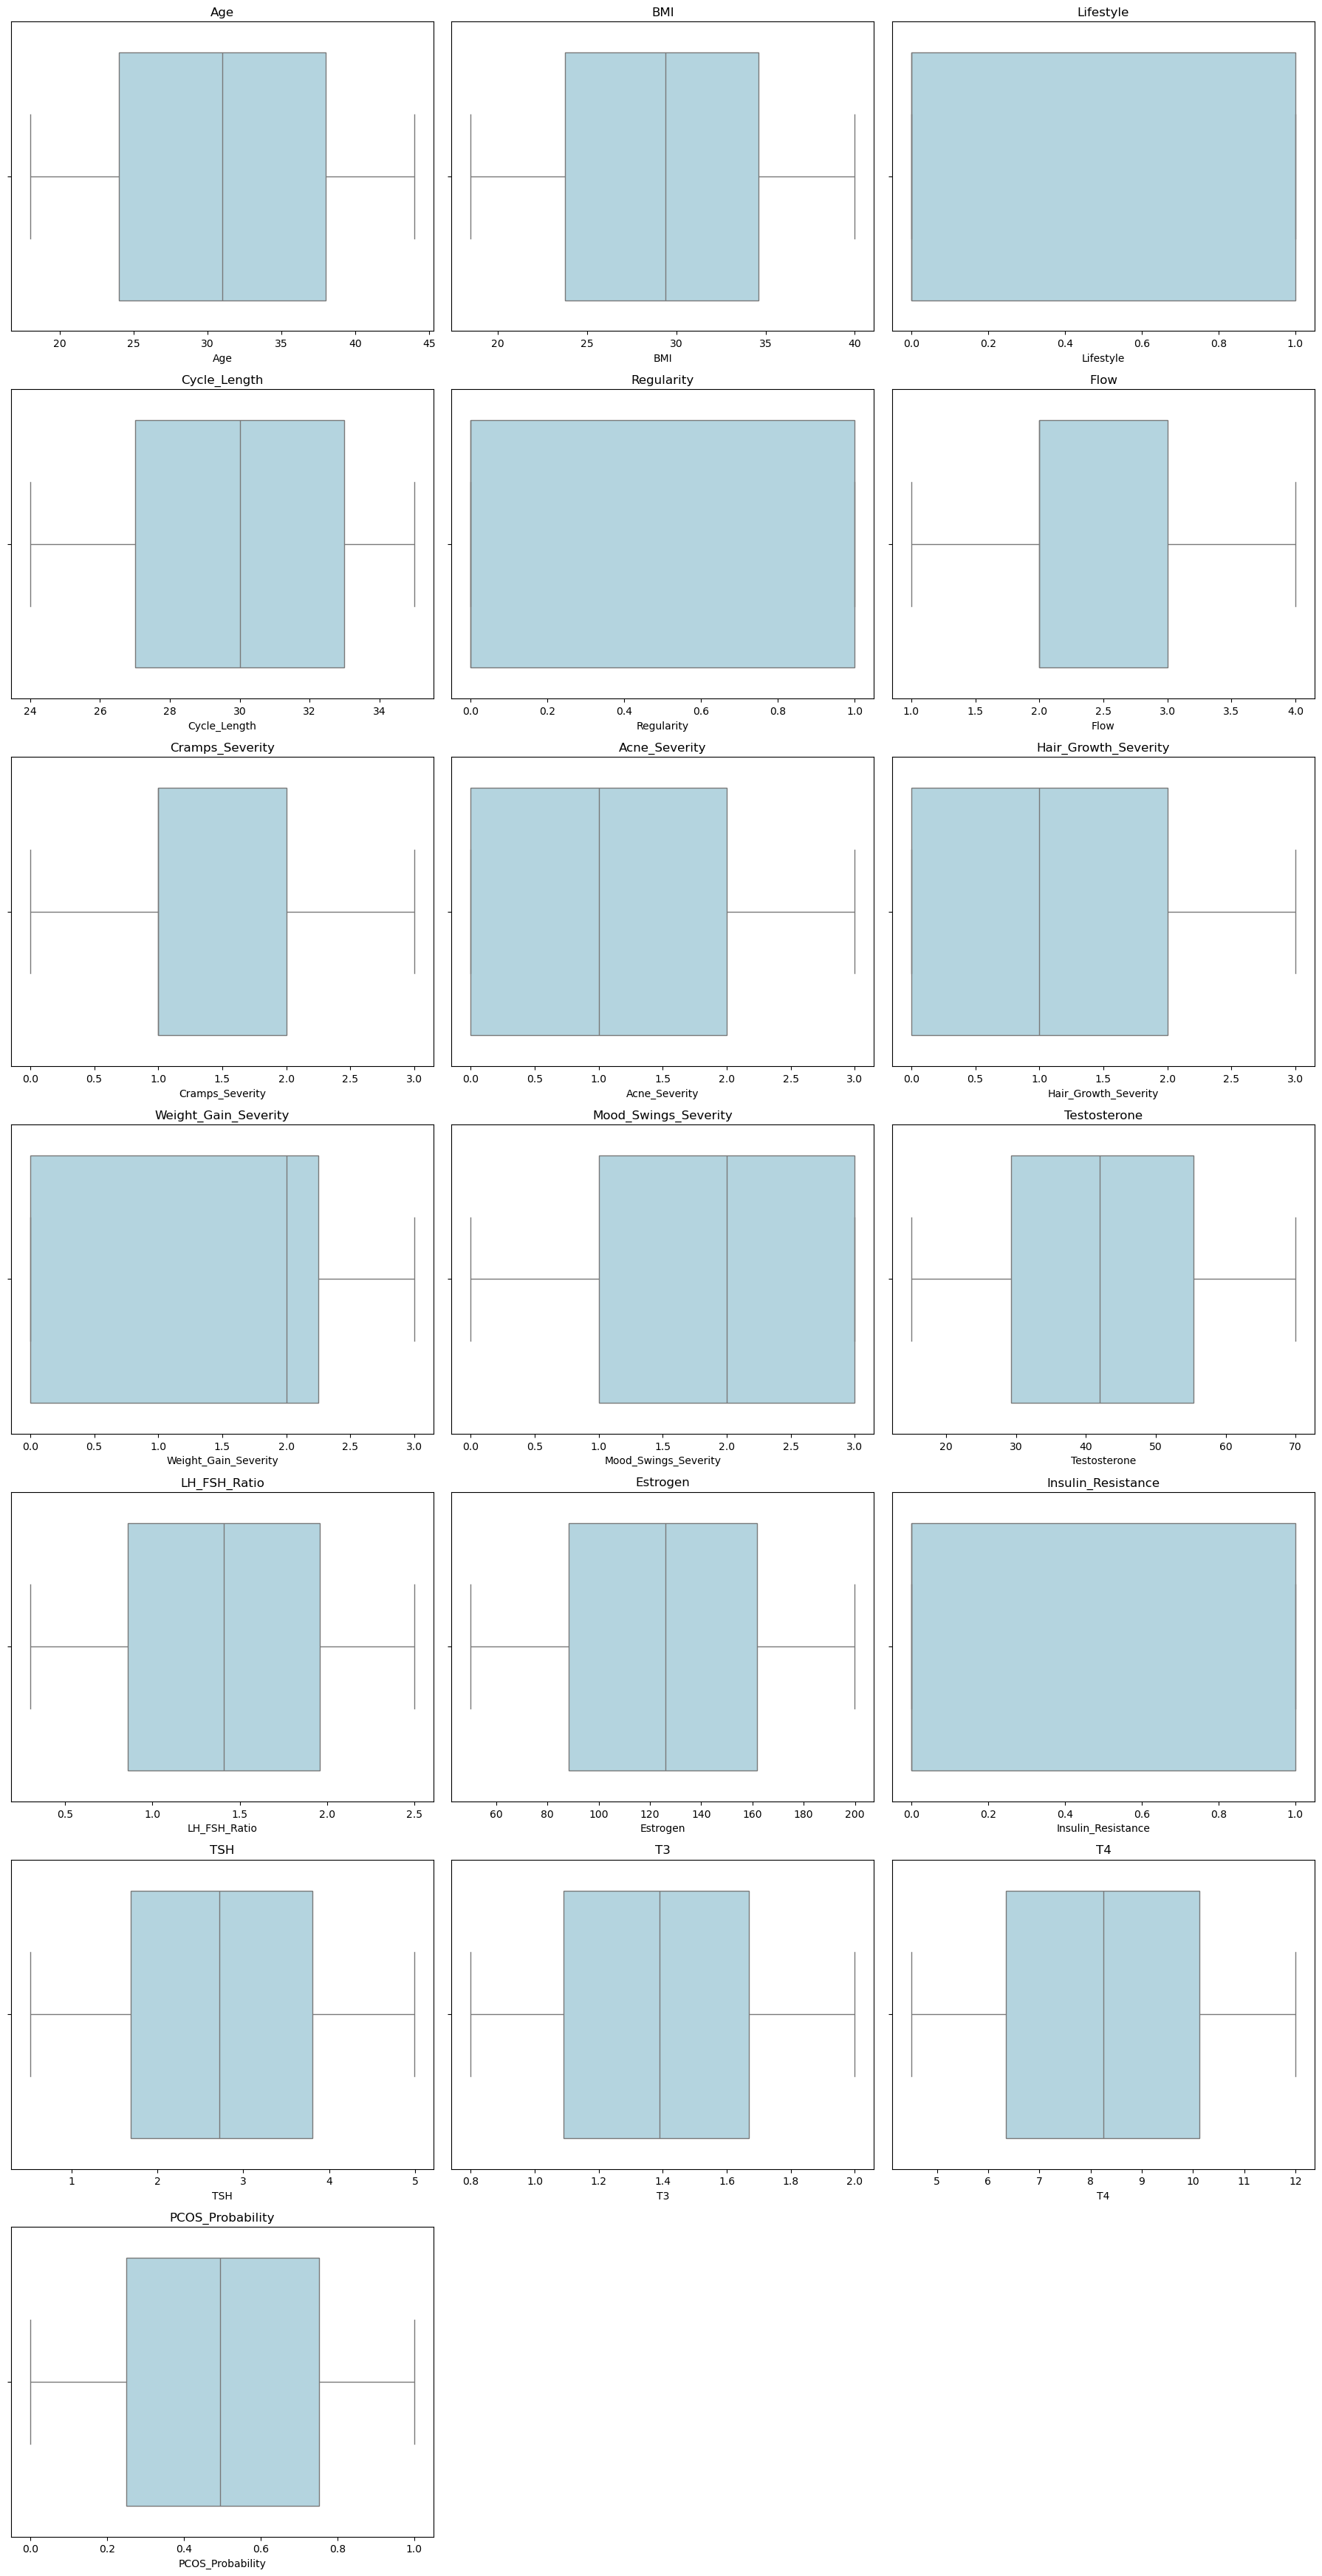

In [26]:
#for checking unrealistic outliers
# Set up grid for boxplots
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3  # You can change this
n_rows = math.ceil(len(num_cols) / n_cols)

# Plot
plt.figure(figsize=(18, 5 * n_rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)

plt.tight_layout()
plt.show()

In [27]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif bmi < 25:
        return 1  # Normal
    elif bmi < 30:
        return 2  # Overweight
    else:
        return 3  # Obese

df["BMI_Category"] = df["BMI"].apply(bmi_category)


In [28]:
df["T3_T4_Ratio"] = df["T3"] / df["T4"]
df["Testo_Estrogen_Ratio"] = df["Testosterone"] / df["Estrogen"]


In [29]:
df["Irregular_Cycle_Score"] = df["Regularity"] * df["Cycle_Length"]


In [30]:
df['PCOS'] = df['PCOS_Probability'].apply(lambda x: 1 if x >= 0.5 else 0)


In [31]:
features = [
    'Flow',
    'Acne_Severity',
    'Hair_Growth_Severity',
    'Weight_Gain_Severity',
    'LH_FSH_Ratio',
    'Insulin_Resistance',
    'TSH',
    'BMI_Category',
    'T3_T4_Ratio',
    'Testo_Estrogen_Ratio',
    'Irregular_Cycle_Score'
]


In [32]:
X = df[features]
y = df['PCOS']

In [33]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
!pip install xgboost
from xgboost import XGBClassifier 

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)


C:\Users\Mehak\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:40:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[77 76]
 [77 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50       153
           1       0.48      0.48      0.48       147

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300



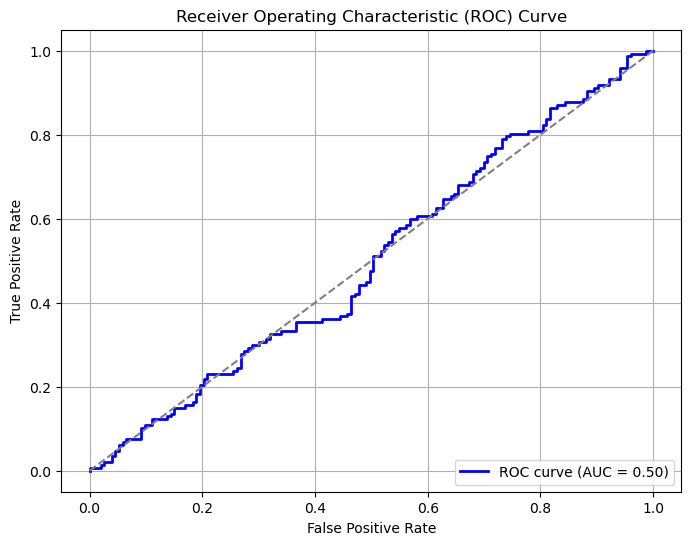

In [36]:
from sklearn.metrics import roc_curve, auc
if len(set(y_test)) == 2:
    y_score = model.predict_proba(X_test)[:, 1]  # get probability for class 1
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [56]:
model.save_model("PCOD-Ml.json")
print("Model saved as 'PCOD-ML.json'")

Model saved as 'PCOD-ML.json'
